# Project Name ---> cardiovascular Disease Predictor!

In [29]:
#importing requered libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score , roc_curve , f1_score , classification_report , confusion_matrix 

In [30]:
# Loading dataset 

file_path = r"C:\Users\Ravichandran\OneDrive\Desktop\logistic regression projects\health_data2nd project.csv.csv"
cardio_data = pd.read_csv(file_path)
cardio_data = cardio_data.copy()

In [31]:
cardio_data.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [32]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  float64
 2   age          70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  float64
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  float64
 7   ap_lo        70000 non-null  float64
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 7.5 MB


In [33]:
cardio_data.describe()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,0.349571,164.359229,74.205690,128.817286,96.630414,0.366871,0.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
cardio_data.isnull().sum()

Unnamed: 0     0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [35]:
# droping unwanted columns 

cardio_data.drop(['Unnamed: 0' , 'id'],axis=1 , inplace=True)

In [36]:
cardio_data.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1


In [37]:
cardio_data['age'].head(4) # this in days i have convert it into years 

0    18393.0
1    20228.0
2    18857.0
3    17623.0
Name: age, dtype: float64

In [38]:
# converting age days into years

cardio_data['age_years'] = cardio_data['age']/365.25

In [39]:
cardio_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50.357290
1,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55.381246
2,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51.627652
3,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48.249144
4,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47.841205


In [40]:
cardio_data['age_years'].head(3)

0    50.357290
1    55.381246
2    51.627652
Name: age_years, dtype: float64

In [41]:
cardio_data.drop(['age'] ,  axis=1 , inplace=True)

In [42]:
cardio_data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50.357290
1,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55.381246
2,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51.627652
3,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48.249144
4,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47.841205


## Visualization of datasets

In [43]:
cardio_data['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

<Axes: xlabel='cardio', ylabel='count'>

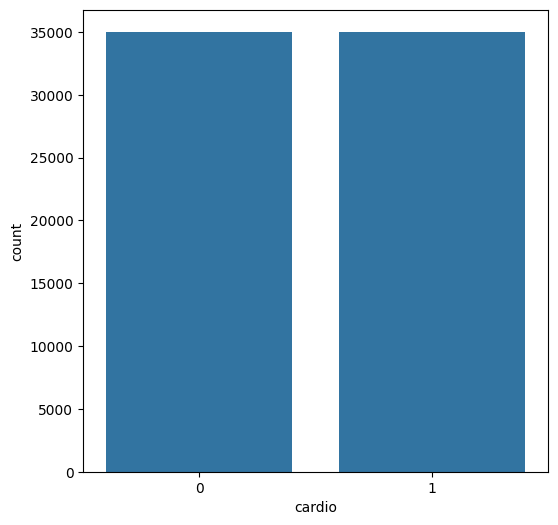

In [44]:
fig = plt.figure(figsize=(6,6))
sns.countplot(data=cardio_data , x='cardio')

In [45]:
cardio_data['gender'].value_counts()

gender
0    45530
1    24470
Name: count, dtype: int64

In [46]:
cardio_data[ 'cholesterol'].value_counts() # 'gluc'

cholesterol
0    52385
1     9549
2     8066
Name: count, dtype: int64

In [47]:
cardio_data['smoke'].value_counts() #alco , active

smoke
0    63831
1     6169
Name: count, dtype: int64

In [48]:
cardio_data['weight']>300 # ap_hi , ap_lo ,height , weight 

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: weight, Length: 70000, dtype: bool

In [49]:
cardio_data.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years'],
      dtype='object')

# Training Random Forest classification

In [50]:
# spliting datasets for training and testing datasets

X = cardio_data[['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active',  'age_years']].values
y = cardio_data['cardio'].values

# training datasets 

X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.3 , random_state=42)


In [51]:
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')
print("X shape:", X.shape)
print("y shape:", y.shape)

Features:
[[  1.         168.          62.         110.          80.
    0.           0.           0.           0.           1.
   50.35728953]
 [  0.         156.          85.         140.          90.
    2.           0.           0.           0.           1.
   55.38124572]
 [  0.         165.          64.         130.          70.
    2.           0.           0.           0.           0.
   51.62765229]
 [  1.         169.          82.         150.         100.
    0.           0.           0.           0.           1.
   48.24914442]
 [  0.         156.          56.         100.          60.
    0.           0.           0.           0.           0.
   47.84120465]
 [  0.         151.          67.         120.          80.
    1.           1.           0.           0.           0.
   59.99726215]
 [  0.         157.          93.         130.          80.
    2.           0.           0.           0.           1.
   60.54209446]
 [  1.         178.          95.         130.       

In [52]:
# Training model 
model = RandomForestClassifier(n_estimators=200 ,class_weight='balanced' , max_depth=10) #Hyperparameter tuning 
model.fit(X_train , y_train)
print(model)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200)


In [53]:
predictions = model.predict(X_test)
print("classification_report : ", classification_report(y_test , predictions))

print("Predicted values : " , predictions )
print("Actual Values : " , y_test)

print("f1_score : " , f1_score(y_test , predictions))

# evaluating using confussion matrix
confusion_matrix(y_test , predictions)


classification_report :                precision    recall  f1-score   support

           0       0.72      0.79      0.75     10461
           1       0.77      0.69      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000

Predicted values :  [1 1 1 ... 1 1 1]
Actual Values :  [1 1 1 ... 0 1 1]
f1_score :  0.7255245630727628


array([[8275, 2186],
       [3295, 7244]])

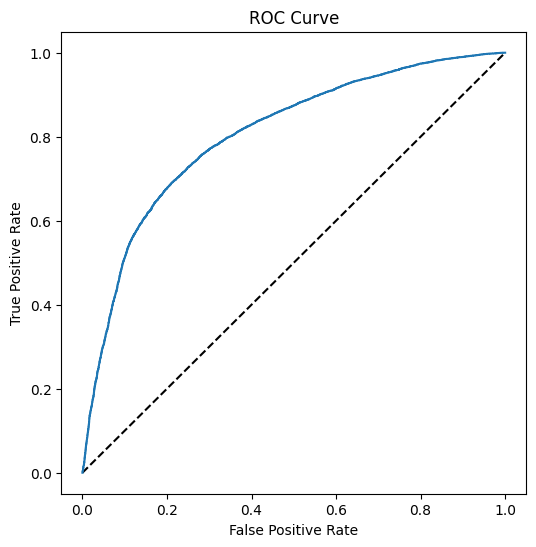

In [54]:
y_score = model.predict_proba(X_test)
fpr , tpr , thresholds  = roc_curve(y_test , y_score[:,1])
fig = plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr , tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [55]:
auc = roc_auc_score(y_test,y_score[:,1])
print(auc)


0.8042929553703866


## Testing Model performance by giving new input data

### HIGH RISK (Probably 1 - heart cardiovascular disease present)
### Prediction: LOW RISK (Probably 0 - healthy)

In [56]:
new_data = [[
    1,      # gender (male=1, female=2 in some datasets)
    170,    # height in cm
    65,     # weight in kg
    120,    # ap_hi (systolic BP)
    80,     # ap_lo (diastolic BP)
    1,      # cholesterol (1 = normal, 2 = above normal, 3 = well above normal)
    1,      # gluc (1 = normal, 2 = above normal, 3 = well above normal)
    0,      # smoke (0 = no, 1 = yes)
    0,      # alco (0 = no, 1 = yes)
    1,      # active (1 = active, 0 = not active)
    29      # age_years
]]
predict_cardio_Disease = model.predict(new_data)
print("predict_cardio_Disease : " ,predict_cardio_Disease)
if predict_cardio_Disease==predict_cardio_Disease:
  print("your healthy, Stay safe")

predict_cardio_Disease :  [0]
your healthy, Stay safe
